In [12]:
import numpy as np 
from keras.initializers import VarianceScaling
from keras.optimizers import SGD
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from skull_stripping import skull_stripping
from sklearn.metrics import davies_bouldin_score

In [13]:
image =  cv2.imread("y.jpg")
print(type(image))

<class 'numpy.ndarray'>


typprrrr <class 'numpy.ndarray'>


4

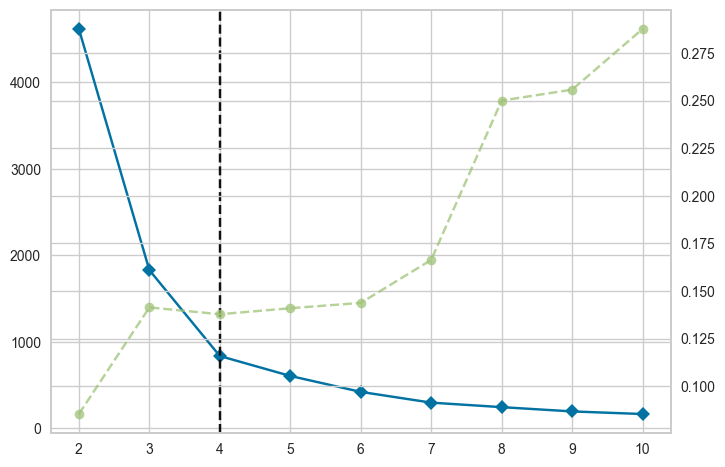

In [14]:
brain_image =skull_stripping(image)
x = brain_image.reshape((-1, 3))
x=x/255
km = KMeans(random_state=42,init="k-means++")
visualizer = KElbowVisualizer(km, k=(2,11))
visualizer.fit(x)
optimal_k = visualizer.elbow_value_
optimal_k

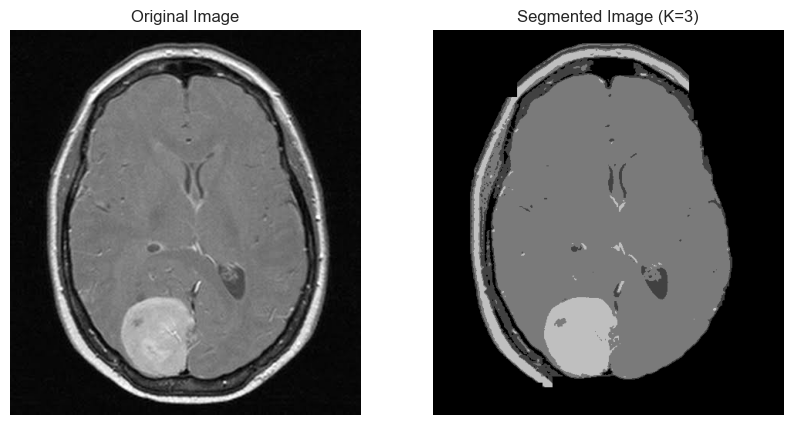

In [15]:
kmeans = KMeans(n_clusters=4,init='k-means++')
kmeans.fit(x)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
db_index = davies_bouldin_score(x, kmeans.labels_)   
# Reshape segmented image back to original shape
segmented_image = segmented_image.reshape(image.shape)
# Display original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (K=3)')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()


In [16]:
db_index

0.3343370722079304